In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv('D:\\Python Projects\\medical Cost prediction\\dataset\\insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

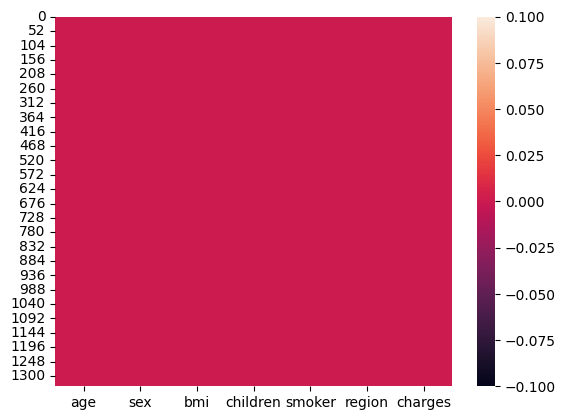

In [6]:
sns.heatmap(dataset.isna())

<Axes: xlabel='sex', ylabel='charges'>

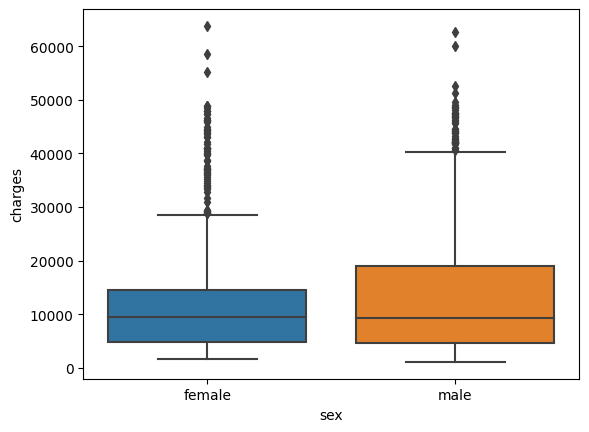

In [7]:
sns.boxplot(data=dataset,x='sex',y='charges')

In [8]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
X = dataset.iloc[:,:-1]

In [14]:
Y = dataset.iloc[:,-1]

In [15]:
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [16]:
Y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
X = pd.get_dummies(X,columns=['region', 'sex','smoker'], prefix=['region', 'sex','smoker'])
X = X.astype(int)

In [18]:
X.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27,0,0,0,0,1,1,0,0,1
1,18,33,1,0,0,1,0,0,1,1,0
2,28,33,3,0,0,1,0,0,1,1,0
3,33,22,0,0,1,0,0,0,1,1,0
4,32,28,0,0,1,0,0,0,1,1,0


In [19]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,random_state=101,test_size=0.2)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain.iloc[:,:2] = sc.fit_transform(Xtrain.iloc[:,:2])

In [21]:
Xtest.iloc[:,:2] = sc.transform(Xtest.iloc[:,:2])

In [22]:
Xtrain.iloc[0,:]

age                -1.157860
bmi                -0.688115
children            0.000000
region_northeast    0.000000
region_northwest    0.000000
region_southeast    1.000000
region_southwest    0.000000
sex_female          0.000000
sex_male            1.000000
smoker_no           1.000000
smoker_yes          0.000000
Name: 804, dtype: float64

In [23]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

In [24]:
Xtrain[0],Xtest[0]

(array([-1.15786012, -0.68811548,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ]),
 array([-0.08154511,  1.11369079,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ]))

In [25]:
import tensorflow as tf 


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
model.compile(loss = 'mae',optimizer='adam',metrics=['mae'])


In [27]:
history = model.fit(Xtrain,Ytrain,epochs=100,validation_data=(Xtest,Ytest))

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13381.1924 - mae: 13381.1924 - val_loss: 12823.2246 - val_mae: 12823.2246
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13378.4062 - mae: 13378.4062 - val_loss: 12818.6943 - val_mae: 12818.6943
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13370.2100 - mae: 13370.2100 - val_loss: 12805.4248 - val_mae: 12805.4248
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13348.7002 - mae: 13348.7002 - val_loss: 12774.0244 - val_mae: 12774.0244
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13303.4668 - mae: 13303.4668 - val_loss: 12713.4688 - val_mae: 12713.4688
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13223.0098 - mae: 13223.0098 - val_loss: 12613.0732 - val_mae: 12613.0732
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13096.4639 - mae: 13096.4639 - val_loss: 1246

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3241 (12.66 KB)
Trainable params: 3241 (12.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


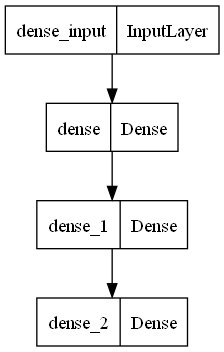

In [29]:
from keras.utils import plot_model
plot_model(model)

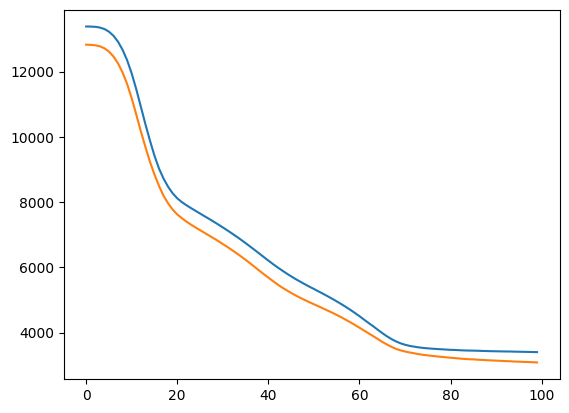

In [30]:
plt.plot(np.arange(0,100),history.history['loss'],label='training loss')
plt.plot(np.arange(0,100),history.history['val_loss'],label='val_loss')
plt.show()

In [31]:
predict = model.predict(Xtest)

9/9 [==============================] - 0s 1ms/step


In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(predict,Ytest)

3086.7185156502164